<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%2014/others/various_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image as IMAGE
import numpy as np
from PIL import Image,ImageOps
import os
import random
import matplotlib.pyplot as plt

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


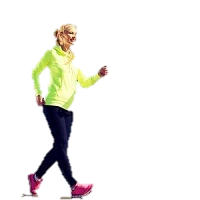

In [0]:
img = Image.open('/content/gdrive/My Drive/eva_files/rcnn/p2.png')
ImageOps.mirror(img)

In [0]:
# resize images
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-100x100')
p = '/content/gdrive/My Drive/eva_files/rcnn/fg-100x100'
imglist = os.listdir('/content/gdrive/My Drive/eva_files/rcnn/people-no bg')
for i in range(1,len(imglist)+1):
  file = '/content/gdrive/My Drive/eva_files/rcnn/people-no bg/'+str(i)+'.jpg'
  im = Image.open(file)
  im1 = im.resize((100,100))
  im1.save(os.path.join(p,'fg'+str(i)+'.png'))

In [14]:
# create mask of images with transparent background
import cv2
from google.colab.patches import cv2_imshow

for i in range(31,39):
  path = '/content/'+str(i)+'.png'
  src = cv2.imread(path,cv2.IMREAD_UNCHANGED)
  print(src.shape) 
  cv2.imwrite(str(i)+'-mask.png', src[:,:,3]) 

(90, 100, 4)
(150, 100, 4)
(135, 100, 4)
(100, 100, 4)
(128, 100, 4)
(150, 100, 4)
(117, 100, 4)
(116, 100, 4)


In [11]:
src.shape

(90, 100, 4)

In [0]:
# rename files
j=0
for i in range(1,9):
  j+=1
  os.rename('/content/'+str(i)+'.png','/content/fg'+str(j)+'.png')
  os.rename('/content/fg-mask'+str(i)+'.png','/content/mask'+str(j)+'.png')

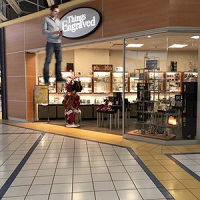

In [21]:

bg = Image.open('/content/1.jpg')
fg = Image.open('/content/fg1.png')
fg1 = ImageOps.mirror(fg)
bg.paste(fg1,(0,0),fg1)
bg

create folders to save overlay and flipped images


In [0]:
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-flip-100x100')
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-flip-mask-100x100')
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-bg')
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-bg-mask')

overlay the images:

In [0]:
i=80001
p = '/content/gdrive/My Drive/eva_files/rcnn/'

for fg_img in range(1,3): # run for 20 foreground images

  black = np.zeros((224,224,3))
  fg = Image.open(p+'fg-no-bg-100x100/'+str(fg_img)+'.png')
  fg_mask = Image.open(p+'fg-mask-100x100/'+str(fg_img)+'.png')
  # flip the images
  fg_flip = ImageOps.mirror(fg)
  fg_mask_flip = ImageOps.mirror(fg_mask)
  # save flipped images 
  fg_flip.save(p+'fg-flip-100x100/fg-flip'+str(20+fg_img)+'.png')
  fg_mask_flip.save(p+'fg-flip-mask-100x100/fg-flip-mask'+str(20+fg_img)+'.png')

  print('fg-flip'+str(20+fg_img)+'.png', 'fg-flip-mask'+str(20+fg_img)+'.png')

  for bg_img in range(1,2): # run for 100 background-images

    bg_path = '/content/gdrive/My Drive/Mask_Rcnn/living_room_224_224/bg'+str(bg_img)+'.jpg'
    
    for _ in range(20):   # overlay each fg + fg-flip 20 times randomly on the bg image
      
      # choose random numbers for location where fg must be pasted on bg
      x = random.randint(0,100)
      y = random.randint(0,100)

      bg = Image.open(bg_path)
        
      # overly fg on bg
      bg.paste(fg,(x,y),fg)
      bg.save(p+'fg-bg/fg-bg'+str(i)+'.png')

      
      black_img = Image.fromarray(black,mode='RGB')
      
      # overlay fg-mask on bg-mask    
      black_img.paste(fg_mask,(x,y),fg_mask)
      black_img.save(p+'fg-bg-mask/fg-bg-mask'+str(i)+'.png')

      print(i,end=' ')
      i+=1
      x = random.randint(0,100)
      y = random.randint(0,100)

      # open bg image
      bg = Image.open(bg_path)
      
      # overlay fg-flip on bg
      bg.paste(fg_flip,(x,y),fg_flip)
      bg.save(p+'fg-bg/fg-bg'+str(i)+'.png')
      
    
      # create a black img
      black_img = Image.fromarray(black,mode='RGB')
      
      # overlay fg-flip-mask on bg
      black_img.paste(fg_mask_flip,(x,y),fg_mask_flip)
      black_img.save(p+'fg-bg-mask/fg-bg-mask'+str(i)+'.png')
      print(i,end=' ')
      i+=1
  print(' ')

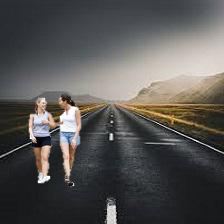

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg80001.png',width=600)

In [0]:
os.mkdir('/content/Overlay')
os.mkdir('/content/Overlay/Fg-Bg')
os.mkdir('/content/Overlay/Fg-Bg-Mask')

In [0]:
fg_bg_num=80001


fg_path = "/content/gdrive/My Drive/Mask_Rcnn/Shilpa/Forground/"
mask_path = "/content/gdrive/My Drive/Mask_Rcnn/Shilpa/Foreground-mask/"

fg_bg_path = '/content/Overlay/Fg-Bg/'
fg_bg_mask_path = '/content/Overlay/Fg-Bg-mask/'

for fg_img in range(1,21): # run for 20 foreground images

  black = np.zeros((224,224,3))
  fg = Image.open(fg_path+str(fg_img)+'.png')
  fg_mask = Image.open(mask_path+str(fg_img)+'.png')
  # flip the images
  fg_flip = ImageOps.mirror(fg)
  fg_mask_flip = ImageOps.mirror(fg_mask)
  # save flipped images 
  # fg_flip.save(p+'fg-flip/fg-flip'+str(20+fg_img)+'.jpg')
  # fg_mask_flip.save(p+'fg-flip-mask/fg-flip-mask'+str(20+fg_img)+'.jpg')

  # print('fg-flip'+str(20+fg_img)+'.jpg', 'fg-flip-mask'+str(20+fg_img)+'.jpg')

  for bg_img in range(1,101): # run for 100 background-images

    bg_path = '/content/gdrive/My Drive/Mask_Rcnn/living_room_224_224/bg'+str(bg_img)+'.jpg'
    
    for _ in range(20):   # overlay each fg + fg-flip 20 times randomly on the bg image
      
      # choose random numbers for location where fg must be pasted on bg
      x = random.randint(0,100)
      y = random.randint(0,100)

      bg = Image.open(bg_path)
        
      # overly fg on bg
      bg.paste(fg,(x,y),fg)

      # save the fg-bg image
      bg.save(fg_bg_path+'fg-bg'+str(i)+'.jpg')

      
      black_img = Image.fromarray(black,mode='RGB')
      
      # overlay fg-mask on bg-mask    
      black_img.paste(fg_mask,(x,y),fg_mask)
      black_img.save(fg_bg_mask_path+'fg-bg-mask'+str(i)+'.jpg')

      fg_bg_num +=1
      x = random.randint(0,100)
      y = random.randint(0,100)

      # open bg image
      bg = Image.open(bg_path)
      
      # overlay fg-flip on bg
      bg.paste(fg_flip,(x,y),fg_flip)
      bg.save(fg_bg_path+'fg-bg'+str(i)+'.jpg')
      
    
      # create a black img
      black_img = Image.fromarray(black,mode='RGB')
      
      # overlay fg-flip-mask on bg
      black_img.paste(fg_mask_flip,(x,y),fg_mask_flip)
      black_img.save(fg_bg_mask_path+'fg-bg-mask'+str(i)+'.jpg')

      fg_bg_num +=1
    print(fg_bg_num)

In [59]:
for i,j,k in os.walk('/content/Overlay'):
  print(i,j,k)

/content/Overlay ['Fg-Bg-Mask', 'Fg-Bg'] []
/content/Overlay/Fg-Bg-Mask [] ['Fg-Bg-Mask80003.jpg', 'Fg-Bg-Mask80014.jpg', 'Fg-Bg-Mask80008.jpg', 'Fg-Bg-Mask80005.jpg', 'Fg-Bg-Mask80016.jpg', 'Fg-Bg-Mask80015.jpg', 'Fg-Bg-Mask80011.jpg', 'Fg-Bg-Mask80006.jpg', 'Fg-Bg-Mask80002.jpg', 'Fg-Bg-Mask80012.jpg', 'Fg-Bg-Mask80001.jpg', 'Fg-Bg-Mask80009.jpg', 'Fg-Bg-Mask80013.jpg', 'Fg-Bg-Mask80010.jpg', 'Fg-Bg-Mask80004.jpg', 'Fg-Bg-Mask80007.jpg']
/content/Overlay/Fg-Bg [] ['Fg-Bg80013.jpg', 'Fg-Bg80008.jpg', 'Fg-Bg80016.jpg', 'Fg-Bg80014.jpg', 'Fg-Bg80003.jpg', 'Fg-Bg80010.jpg', 'Fg-Bg80015.jpg', 'Fg-Bg80006.jpg', 'Fg-Bg80011.jpg', 'Fg-Bg80002.jpg', 'Fg-Bg80004.jpg', 'Fg-Bg80007.jpg', 'Fg-Bg80012.jpg', 'Fg-Bg80005.jpg', 'Fg-Bg80001.jpg', 'Fg-Bg80009.jpg']


In [0]:
#Export Zip file
from zipfile import ZipFile 
import os 
  
def get_all_file_paths(directory): 
  
    # initializing empty file paths list 
    file_paths = [] 
  
    # crawling through directory and subdirectories 
    for root, directories, files in os.walk(directory): 
        for filename in files: 
            # join the two strings in order to form the full filepath. 
            filepath = os.path.join(root, filename) 
            file_paths.append(filepath) 
  
    # returning all file paths 
    return file_paths         
  
def main(): 
    # path to folder which needs to be zipped 
    directory = 'Overlay'
  
    # calling function to get all file paths in the directory 
    file_paths = get_all_file_paths(directory) 
  
    # printing the list of all files to be zipped 
    # print('Following files will be zipped:') 
    # for file_name in file_paths: 
    #     print(file_name) 
  
    # writing files to a zipfile 
    with ZipFile('/content/gdrive/My Drive/Mask_Rcnn/shilpa/test.zip','w') as zip: 
        # writing each file one by one 
        for file in file_paths: 
            zip.write(file) 
  
    print('All files zipped successfully!')         
  
  

main() 

In [94]:
!ls 

1.jpg	    fg3.png  fg7.png	mask2.png  mask6.png  sample_data
DenseDepth  fg4.png  fg8.png	mask3.png  mask7.png  zipfile
fg1.png     fg5.png  gdrive	mask4.png  mask8.png
fg2.png     fg6.png  mask1.png	mask5.png  Overlay


In [97]:
!ls Overlay/Fg-Bg | wc -l

80


In [0]:
!ls Overlay/Fg-Bg-Mask | wc -l

In [0]:
os.mkdir('/content/zipfile')

In [0]:
import shutil
shutil.rmtree('/content/Overlay')
shutil.rmtree('/content/zipfile')

In [89]:

#To import zip file
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "/content/gdrive/My Drive/Mask_Rcnn/shilpa/test.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip_file: 
    # printing all the contents of the zip file 
    #zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip_file.extractall('/content/zipfile') 
    print('Done!') 

Extracting all the files now...
Done!


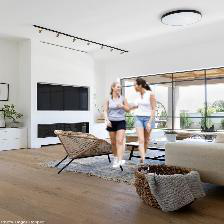

In [79]:
Image.open('/content/zipfile/Overlay/Fg-Bg/Fg-Bg1.jpg')

In [72]:
!git clone https://github.com/mshilpaa/DenseDepth.git

fatal: destination path 'DenseDepth' already exists and is not an empty directory.


In [73]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O ./DenseDepth/nyu.h5

--2020-05-04 14:29:29--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.102.3
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.102.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897376 (165M) [application/h5]
Saving to: ‘./DenseDepth/nyu.h5’

./DenseDepth/nyu.h5 100%[===================>] 164.89M  20.6MB/s    in 9.1s    

2020-05-04 14:29:39 (18.2 MB/s) - ‘./DenseDepth/nyu.h5’ saved [172897376/172897376]



In [0]:
import os
os.mkdir('/content/DenseDepth/output')

In [0]:
# shutil.rmtree('/content/DenseDepth/output')

In [92]:
!cd DenseDepth; python test.py --input '/content/zipfile/Overlay/Fg-Bg/*.jpg' --output_img_size 224

Using TensorFlow backend.
Loading model...

Model loaded (nyu.h5).

Loaded (80) images of size (640, 480, 3).
<Figure size 1000x500 with 1 Axes>


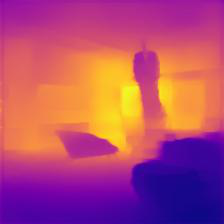

In [93]:
Image.open('/content/DenseDepth/output/depth_img-0.jpg') 

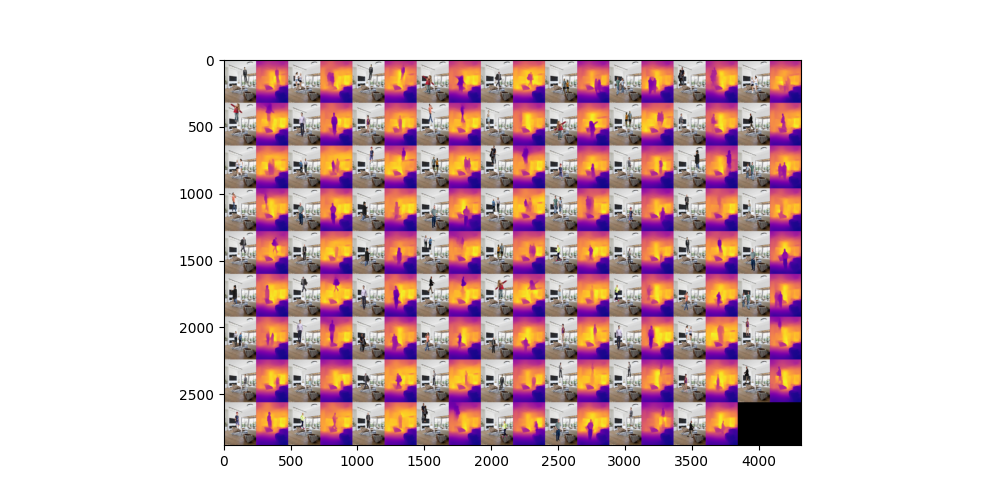

In [100]:
Image.open('/content/DenseDepth/test.png') 